**Final Project Computer Vision**

**Kelompok 10**

Anggota Kelompok:

Nama  : Rio Pramana, Debora

NIM   : 2440016804, 2440087214

Kelas : LA01

**This code is used to evaluate demo results and create a web-based GUI for users to input an image of their own**

# Import libraries & Initialize parameters

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
resized_dim = 128

# Define functions for the GUI

The function below is to load and return the face detector

In [3]:
def load_face_detector():
    haarcascade_path = "./haarcascade_frontalface_default.xml"
    face_model = cv2.CascadeClassifier(haarcascade_path)
    return face_model

The function below is to preprocess the input image before passed into the next step

In [4]:
def preprocess_input(img):
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    return img

The function below is used to return the faces detected by the face detector

We found that the scaleFactor and minNeighbors we used was able to return the best results

In [5]:
def detect_faces(face_detector, gray_img):
    detected_faces = face_detector.detectMultiScale(
        image = gray_img,
        scaleFactor = 1.10, #mengecilkan 10% setiap loop
        minNeighbors = 4
    ) #return jumlah face yg ke detect di 1 image tersebut
    return detected_faces

This function is used to crop the image to get the detected face

In [6]:
def crop_face(img, face_rect):
    (x,y,w,h) = face_rect
    face_img = img[y:y+h,x:x+w]
    face_img = cv2.resize(face_img, dsize = (resized_dim,resized_dim))
    face_img = np.reshape(face_img,[1,resized_dim,resized_dim,3]) / 255.0
    return face_img

This function is used to return the box outline color based on the prediction

In [7]:
def return_color(img_label):
    if (img_label == "MASK"):
        return (0, 255, 0)
    else:
        return (255, 0, 0)

This function is used to load the model from the pickle file

In [8]:
def load_model():
    with open("final_model.pkl", "rb") as f:
        model = pickle.load(f)
    return model

This function is used to describe the whole process of detecting whether or not the person is wearing a mask

The process starts after the faces have been detected from the input image

In [9]:
def detect_mask(faces, mask_detector, gray_img, img):
    mask_label = {
        0:'MASK',
        1:'NO MASK'
    }
    label = [0 for i in range(len(faces))]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for face_rect in faces:
        (x,y,w,h) = face_rect
        face_img = crop_face(img, face_rect)
        mask_result = mask_detector.predict(face_img)
        img_label = mask_label[mask_result.argmax()]
        color = return_color(img_label)
        cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
        cv2.putText(img, img_label, (x, y-3), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
    return img

The function below is used to display image

In [10]:
def show_img(img):
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Demo Results

## First demo

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-22 14:57:28         6356
metadata.json                                  2023-01-22 14:57:28           64
variables.h5                                   2023-01-22 14:57:30       603672
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dr

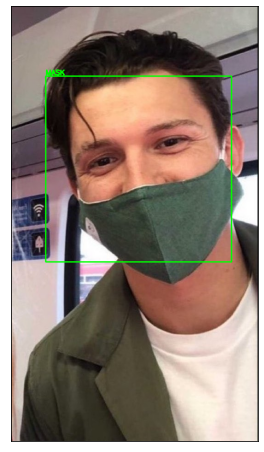

In [11]:
# Read image
img = cv2.imread('./Demo/tom_holland.jpg')
# Load face detector
fd = load_face_detector()
# Preprocess image
gray_img = preprocess_input(img)
# Detect faces
faces = detect_faces(fd, gray_img)
# Load mask detector
model = load_model()
# Detect mask
final_img = detect_mask(faces, model, gray_img, img)
# Display the final image
show_img(final_img)

## Second demo

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-22 14:57:28         6356
metadata.json                                  2023-01-22 14:57:28           64
variables.h5                                   2023-01-22 14:57:30       603672
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dr

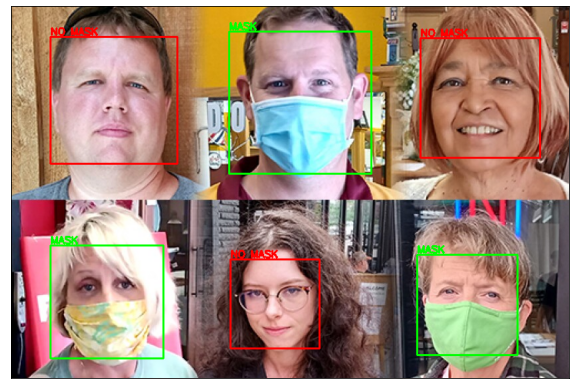

In [12]:
# Read image
img = cv2.imread('./Demo/campur.jpg')
# Load face detector
fd = load_face_detector()
# Preprocess image
gray_img = preprocess_input(img)
# Detect faces
faces = detect_faces(fd, gray_img)
# Load mask detector
model = load_model()
# Detect mask
final_img = detect_mask(faces, model, gray_img, img)
# Display the final image
show_img(final_img)

## Third demo

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-22 14:57:28         6356
metadata.json                                  2023-01-22 14:57:28           64
variables.h5                                   2023-01-22 14:57:30       603672
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dr

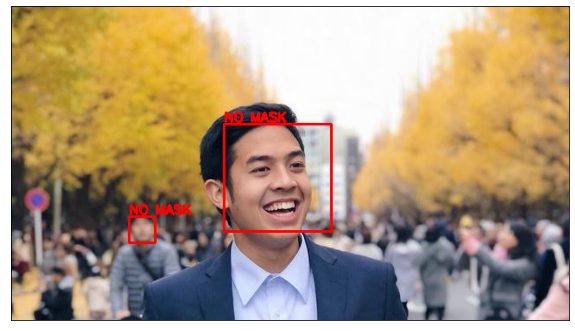

In [13]:
# Read image
img = cv2.imread('./Demo/demo2.jpg')
# Load face detector
fd = load_face_detector()
# Preprocess image
gray_img = preprocess_input(img)
# Detect faces
faces = detect_faces(fd, gray_img)
# Load mask detector
model = load_model()
# Detect mask
final_img = detect_mask(faces, model, gray_img, img)
# Display the final image
show_img(final_img)

## Fourth Demo

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-22 14:57:28         6356
metadata.json                                  2023-01-22 14:57:28           64
variables.h5                                   2023-01-22 14:57:30       603672
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dr

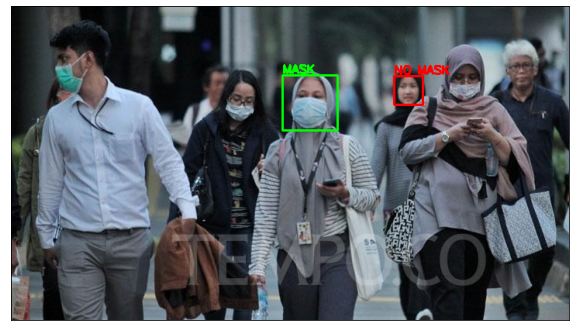

In [14]:
# Read image
img = cv2.imread('./Demo/mass_people.jpg')
# Load face detector
fd = load_face_detector()
# Preprocess image
gray_img = preprocess_input(img)
# Detect faces
faces = detect_faces(fd, gray_img)
# Load mask detector
model = load_model()
# Detect mask
final_img = detect_mask(faces, model, gray_img, img)
# Display the final image
show_img(final_img)

# Web-Based GUI

The function below is used to compile the whole mask detection process into a single function

In [15]:
def main_prog(inp):
    model = load_model()
    face_model = load_face_detector()
    img = inp
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_img = preprocess_input(img)
    faces = detect_faces(face_model, gray_img)
    if (len(faces) < 1):
        return "No face detected"
    else:
        final_img = detect_mask(faces, model, gray_img, img)
        return final_img

The function below is used to create the GUI using gradio

In [16]:
import gradio as gr
demo = gr.Interface(fn=main_prog, inputs="image", outputs="image")
demo.launch(share=True)

IMPORTANT: You are using gradio version 3.0.19, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://9dbed7f967aa4ba9.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://www.huggingface.co/spaces)


(<gradio.routes.App at 0x1ab662b6e50>,
 'http://127.0.0.1:7860/',
 'https://9dbed7f967aa4ba9.gradio.app')